In [1]:
# import required basic library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# filter the all unnecessary warning
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Lode dataset
df = pd.read_csv("../Data/Amazone_sales_data.csv")

In [3]:
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,19999.0,False,400,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,9999.0,True,500,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,2499.0,False,600,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,9999.0,False,400,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,4999.0,False,100,Hi-Fi Speakers


Basic information of data set

In [4]:
df.shape

(300000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               300000 non-null  object 
 1   title              300000 non-null  object 
 2   imgUrl             300000 non-null  object 
 3   productURL         300000 non-null  object 
 4   stars              300000 non-null  float64
 5   reviews            300000 non-null  int64  
 6   price              300000 non-null  float64
 7   isBestSeller       300000 non-null  bool   
 8   boughtInLastMonth  300000 non-null  int64  
 9   categoryName       300000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 20.9+ MB


In [6]:
df.describe()

,stars,reviews,price,boughtInLastMonth
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,2.799656,450.097400,4003.690011,304.823833
std,2.104685,2992.874394,6599.918041,284.314014
min,0.000000,0.000000,0.010000,50.000000
25%,0.000000,0.000000,16.950000,150.000000
50%,4.100000,8.000000,199.000000,250.000000
75%,4.500000,124.000000,6999.000000,500.000000
max,5.000000,477914.000000,49999.000000,50000.000000


# Droping Extra column

In [7]:
df = df.drop(columns = ['imgUrl', 'asin', 'productURL'], axis = 1)

In [8]:
df.head()

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,19999.0,False,400,Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,9999.0,True,500,Hi-Fi Speakers
2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,2499.0,False,600,Hi-Fi Speakers
3,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,9999.0,False,400,Hi-Fi Speakers
4,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,4999.0,False,100,Hi-Fi Speakers


# Remove null values and remove duplictes

In [9]:
df.isnull().sum()

title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

In [10]:
df.duplicated().sum()

1029

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(298971, 7)

# Feature engineering : 


In [13]:
# Extract Product name
import re
def extract_name(title):
    name = title.split('|')[0]
    name = re.sub(r'\(.*?\)', '', name)
    return name.strip()

In [14]:
# Adding product name column
df['product_name'] = df['title'].apply(extract_name)

In [15]:
df = df.drop(columns = ['title'], axis = 1)

In [16]:
df.head()

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,product_name
0,4.7,15308,19999.0,False,400,Hi-Fi Speakers,Echo Dot
1,4.7,98099,9999.0,True,500,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth..."
2,4.7,15308,2499.0,False,600,Hi-Fi Speakers,Echo Dot
3,4.7,7205,9999.0,False,400,Hi-Fi Speakers,Echo Dot with clock
4,4.6,1881,4999.0,False,100,Hi-Fi Speakers,Introducing Echo Pop


In [ ]:
# add new column popular product

conditions = [
    (df['stars'] >= 0) & (df['stars'] < 2),
    (df['stars'] >= 2) & (df['stars'] < 4),
    (df['stars'] >= 4) & (df['stars'] <= 5)
]
choices = ['Not Popular', 'Average Product', 'Popular Product']
df['Product_popularity'] = np.select(conditions, choices, default='Unknown')


In [ ]:
# add new column Product cost range

conditions1 = [
    (df['price'] >= 99) & (df['price'] < 5000),
    (df['price'] >= 5000) & (df['price'] < 20000),
    (df['price'] >= 20000) & (df['price'] <= 40000),
    (df['price'] >= 40000) & (df['price'] <= 50000)
]
choices1 = ['Low cost ', 'Low midrange cost', 'Midrange cost', 'Premium cost']
df['Product_cost_range'] = np.select(conditions1, choices1, default='Unknown')

In [ ]:
# add new column DemandOfTheProduct

conditions2 = [
    (df['boughtInLastMonth'] >= 50) & (df['boughtInLastMonth'] < 200),
    (df['boughtInLastMonth'] >= 200) & (df['boughtInLastMonth'] < 500),
    (df['boughtInLastMonth'] >= 500) & (df['boughtInLastMonth'] <= 600)
]
choices2 = ['Low dimand', 'Neutral dimand', 'High dimand']
df['DemandOfTheProduct'] = np.select(conditions2, choices2, default='Unknown')

# Performing EDA

<Axes: >

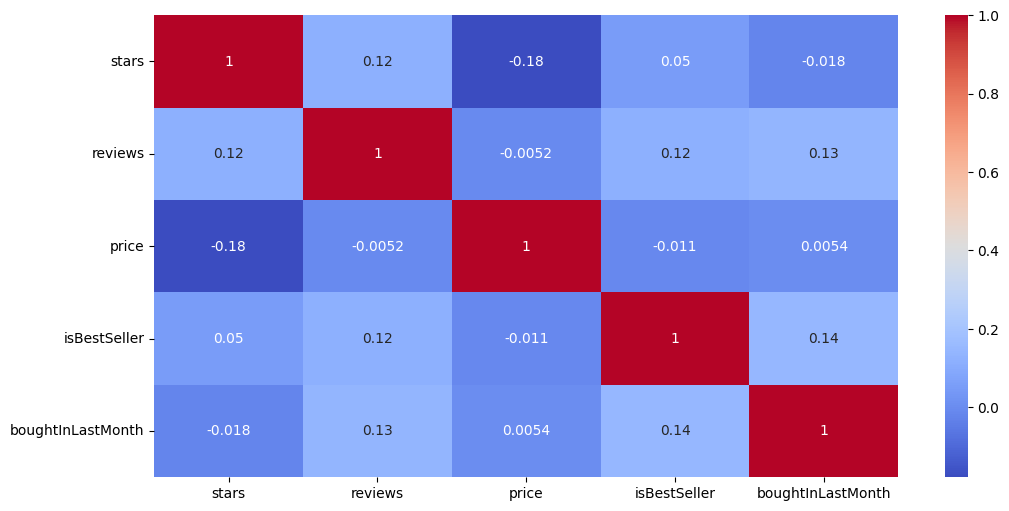

In [23]:
#  Correlation between all numerical columns

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [24]:
# Seprate my object and numerical columns for visualization

num_cols = ['stars', 'reviews', 'price', 'boughtInLastMonth', 'future_trend', 'PricePerUnit']
object_col = ['categoryName', 'Product_popularity', 'Product_cost_range', 'DemandOfTheProduct']

In [25]:
# Distribution plots
# for col in num_cols:
#     plt.figure(figsize=(8,4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()
     
#     # Boxplot to identify outliers
#     plt.figure(figsize=(8,4))
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [26]:
#  Count plots for categorical columns

# for col in object_col:
#     print(f'Count of unique values in {col}: {df[col].nunique()}')
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=df[col], order=df[col].value_counts().index)
#     plt.title(f'Count of {col}')
#     plt.xticks(rotation = 90)
#     plt.show()

# Removing outliers from all numerical columns

In [27]:
num_cols = ['stars', 'reviews', 'price', 'boughtInLastMonth']

for col in num_cols:
    # Calculate IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Calculate mean
    col_mean = df[col].mean()
    
    # Replace outliers with mean
    df.loc[(df[col] > upper_limit) | (df[col] < lower_limit), col] = col_mean

In [28]:
# Saving my clean data 
df.to_csv('Cleanded_data.csv', index = False)